#### Author Name: M Shifat Hossain
#### Dataset: Credit Card Transactions Fraud Detection Dataset [Link](https://www.kaggle.com/datasets/kartik2112/fraud-detection?select=fraudTrain.csv)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Training set for Credit Card Transactions

    index - Unique Identifier for each row
    trans_date_trans_time - Transaction DateTime
    cc_num - Credit Card Number of Customer
    merchant - Merchant Name
    category - Category of Merchant
    amt - Amount of Transaction
    first - First Name of Credit Card Holder
    last - Last Name of Credit Card Holder
    gender - Gender of Credit Card Holder
    street - Street Address of Credit Card Holder
    city - City of Credit Card Holder
    state - State of Credit Card Holder
    zip - Zip of Credit Card Holder
    lat - Latitude Location of Credit Card Holder
    long - Longitude Location of Credit Card Holder
    city_pop - Credit Card Holder's City Population
    job - Job of Credit Card Holder
    dob - Date of Birth of Credit Card Holder
    trans_num - Transaction Number
    unix_time - UNIX Time of transaction
    merch_lat - Latitude Location of Merchant
    merch_long - Longitude Location of Merchant
    is_fraud - Fraud Flag <--- Target Class


In [3]:
dataset = pd.read_csv('./fraudTrain.csv')

In [4]:
dataset

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [5]:
len(dataset['category'].unique())

14

In [6]:
# Class percentage
print(dataset['is_fraud'].value_counts(normalize=True) * 100)

# Unique
print(len(dataset['job'].unique()), dataset['job'].unique())
print(len(dataset['category'].unique()), dataset['category'].unique())

is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64
494 ['Psychologist, counselling' 'Special educational needs teacher'
 'Nature conservation officer' 'Patent attorney'
 'Dance movement psychotherapist' 'Transport planner' 'Arboriculturist'
 'Designer, multimedia' 'Public affairs consultant' 'Pathologist'
 'IT trainer' 'Systems developer' 'Engineer, land' 'Systems analyst'
 'Naval architect' 'Radiographer, diagnostic'
 'Programme researcher, broadcasting/film/video' 'Energy engineer'
 'Event organiser' 'Operational researcher' 'Market researcher'
 'Probation officer' 'Leisure centre manager'
 'Corporate investment banker' 'Therapist, occupational'
 'Call centre manager' 'Police officer' 'Education officer, museum'
 'Physiotherapist' 'Network engineer' 'Forensic psychologist' 'Geochemist'
 'Armed forces training and education officer' 'Designer, furniture'
 'Optician, dispensing' 'Psychologist, forensic' 'Librarian, public'
 'Fine artist' 'Scientist, research (maths

In [7]:
list(dataset.loc[:,'category'].unique())

['misc_net',
 'grocery_pos',
 'entertainment',
 'gas_transport',
 'misc_pos',
 'grocery_net',
 'shopping_net',
 'shopping_pos',
 'food_dining',
 'personal_care',
 'health_fitness',
 'travel',
 'kids_pets',
 'home']

In [8]:
def replaceWithPointer(inCol):
    UCol = list(inCol.unique())
    UIndx = range(len(UCol))
    return UCol,UIndx

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'misc_net'),
  Text(1, 0, 'grocery_pos'),
  Text(2, 0, 'entertainment'),
  Text(3, 0, 'gas_transport'),
  Text(4, 0, 'misc_pos'),
  Text(5, 0, 'grocery_net'),
  Text(6, 0, 'shopping_net'),
  Text(7, 0, 'shopping_pos'),
  Text(8, 0, 'food_dining'),
  Text(9, 0, 'personal_care'),
  Text(10, 0, 'health_fitness'),
  Text(11, 0, 'travel'),
  Text(12, 0, 'kids_pets'),
  Text(13, 0, 'home')])

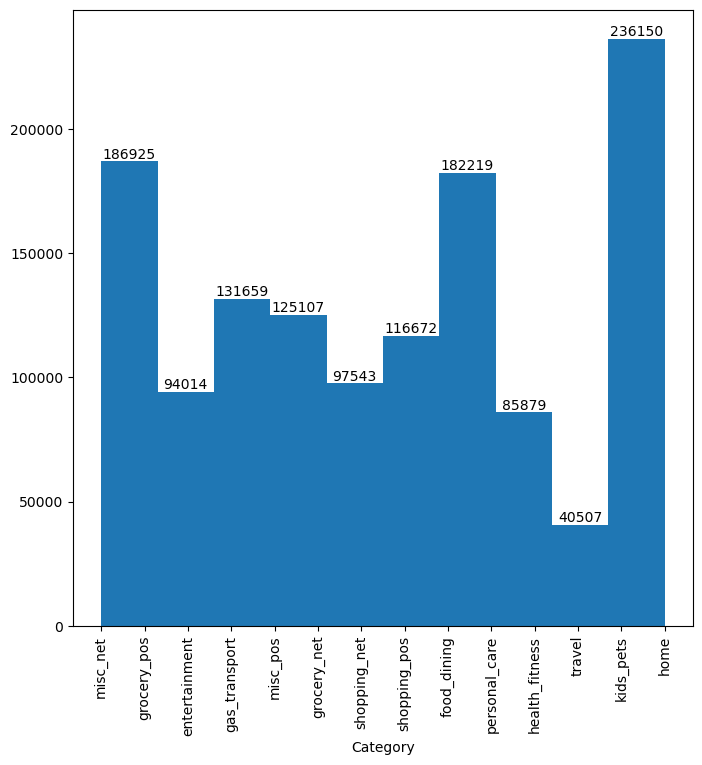

In [9]:
plt.figure(figsize=(8,8))
vals,bins,bars=plt.hist(dataset['category'])
plt.xlabel('Category')
plt.bar_label(bars)
plt.xticks(rotation='vertical')

In [10]:
def plotClassHist(data,xLabel,xTick=True):
    plt.figure(figsize=(8,8))
    vals,bins,bars=plt.hist(data,bins=len(data.unique()))
    plt.xlabel(xLabel)
    plt.bar_label(bars)
    plt.xticks(rotation='vertical')
#     if not xTick:
#         plt.xticks()

In [11]:
#### Dataset preprocessing


dat = dataset # copied for keeping source intact

dat = dat[['cc_num','category','amt','gender','city',
           'state','lat','long','city_pop','job','unix_time','merch_lat','merch_long','is_fraud']]

category_uval,category_uidx = replaceWithPointer(dat.loc[:,'category'])
dat.loc[:,'category'] = dat.loc[:,'category'].replace(category_uval,category_uidx)

city_uval,city_uidx = replaceWithPointer(dat.loc[:,'city'])
dat.loc[:,'city'] = dat.loc[:,'city'].replace(city_uval,city_uidx)

gender_uval,gender_uidx = replaceWithPointer(dat.loc[:,'gender'])
dat.loc[:,'gender'] = dat.loc[:,'gender'].replace(gender_uval,gender_uidx)

state_uval,state_uidx = replaceWithPointer(dat.loc[:,'state'])
dat.loc[:,'state'] = dat.loc[:,'state'].replace(state_uval,state_uidx)

job_uval,job_uidx = replaceWithPointer(dat.loc[:,'job'])
dat.loc[:,'job'] = dat.loc[:,'job'].replace(job_uval,job_uidx)


In [12]:
dat

,cc_num,category,amt,gender,city,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,0,4.97,0,0,0,36.0788,-81.1781,3495,0,1325376018,36.011293,-82.048315,0
1,630423337322,1,107.23,0,1,1,48.8878,-118.2105,149,1,1325376044,49.159047,-118.186462,0
2,38859492057661,2,220.11,1,2,2,42.1808,-112.2620,4154,2,1325376051,43.150704,-112.154481,0
3,3534093764340240,3,45.00,1,3,3,46.2306,-112.1138,1939,3,1325376076,47.034331,-112.561071,0
4,375534208663984,4,41.96,1,4,4,38.4207,-79.4629,99,4,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,2,15.56,1,457,29,37.7175,-112.4777,258,331,1371816728,36.841266,-111.690765,0
1296671,6011149206456997,8,51.70,1,315,32,39.2667,-77.5101,100,250,1371816739,38.906881,-78.246528,0
1296672,3514865930894695,8,105.93,1,14,12,32.9396,-105.8189,899,14,1371816752,33.619513,-105.130529,0
1296673,2720012583106919,8,74.90,1,234,45,43.3526,-102.5411,1126,194,1371816816,42.788940,-103.241160,0


category
gas_transport     10.153585
grocery_pos        9.535003
home               9.494669
shopping_pos       8.997783
kids_pets          8.717296
shopping_net       7.522548
entertainment      7.250390
food_dining        7.053502
personal_care      6.999287
health_fitness     6.623017
misc_pos           6.143020
misc_net           4.880714
grocery_net        3.505273
travel             3.123913
Name: proportion, dtype: float64
city
Birmingham     0.433185
San Antonio    0.395627
Utica          0.393699
Phoenix        0.391386
Meridian       0.390229
                 ...   
Vacaville      0.000540
Claypool       0.000540
Karns City     0.000540
Bruce          0.000540
Chattanooga    0.000540
Name: proportion, Length: 894, dtype: float64
gender
F    54.744867
M    45.255133
Name: proportion, dtype: float64
state
TX    7.316868
NY    6.439624
PA    6.157827
CA    4.346502
OH    3.584553
MI    3.559412
IL    3.335608
FL    3.290801
AL    3.161085
MO    2.961652
MN    2.445794
AR    2.40

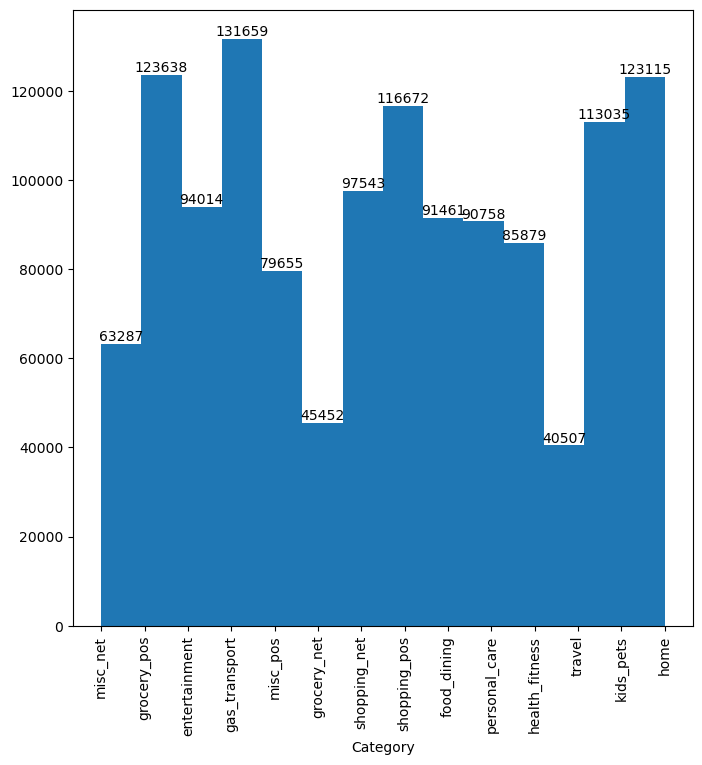

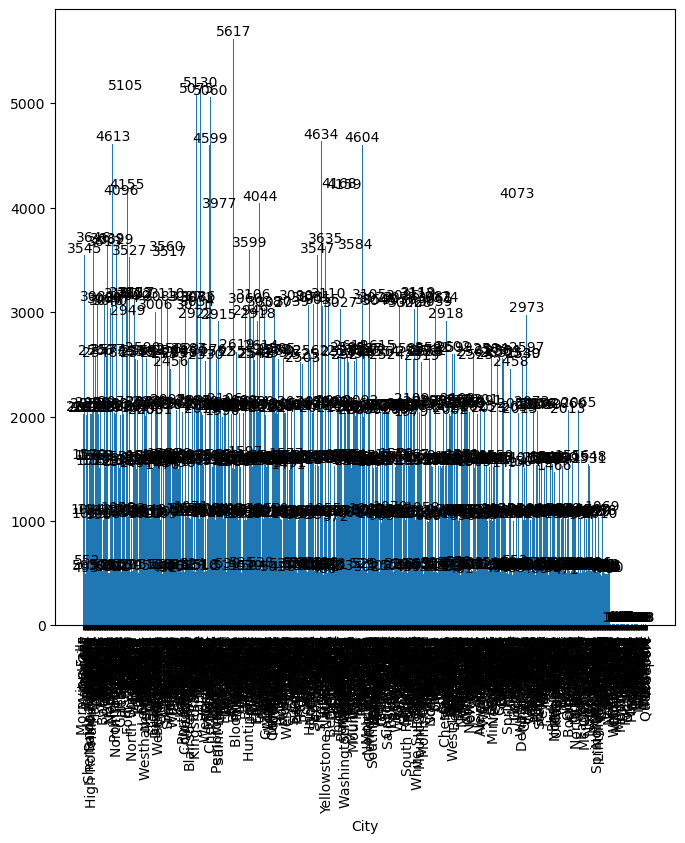

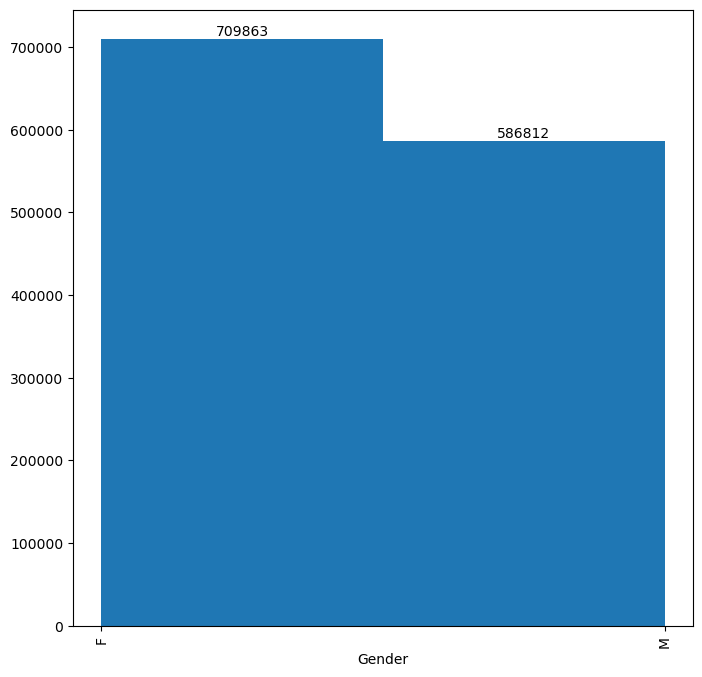

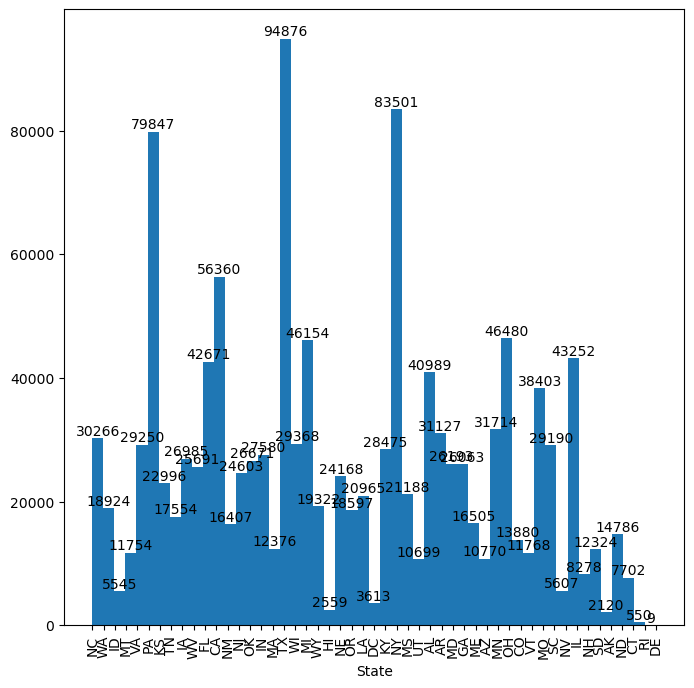

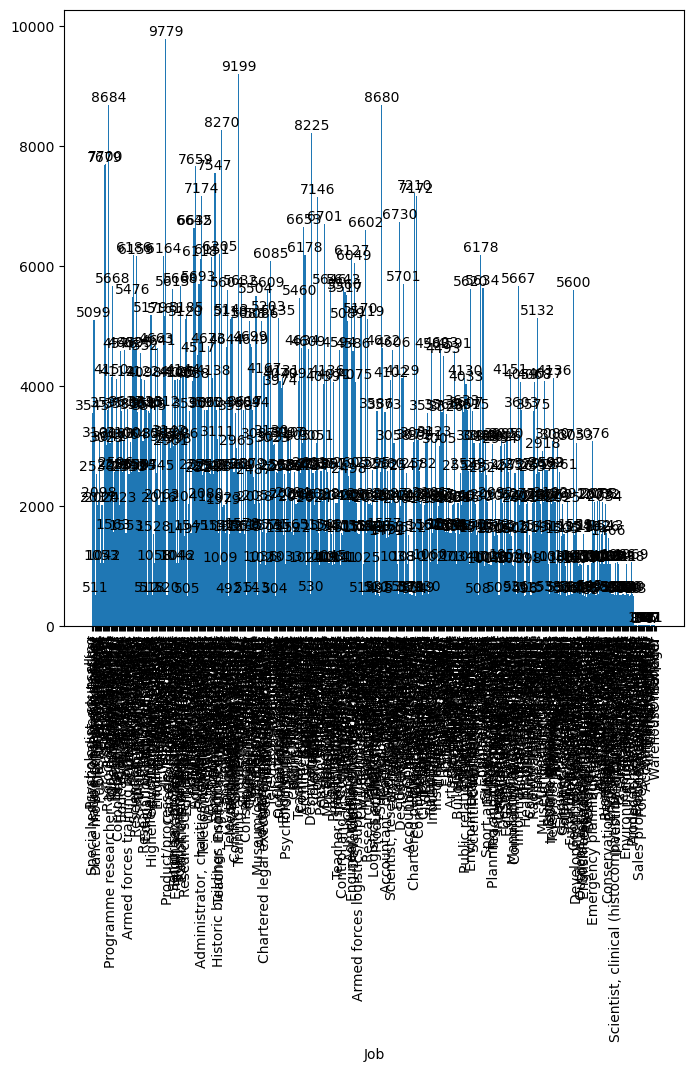

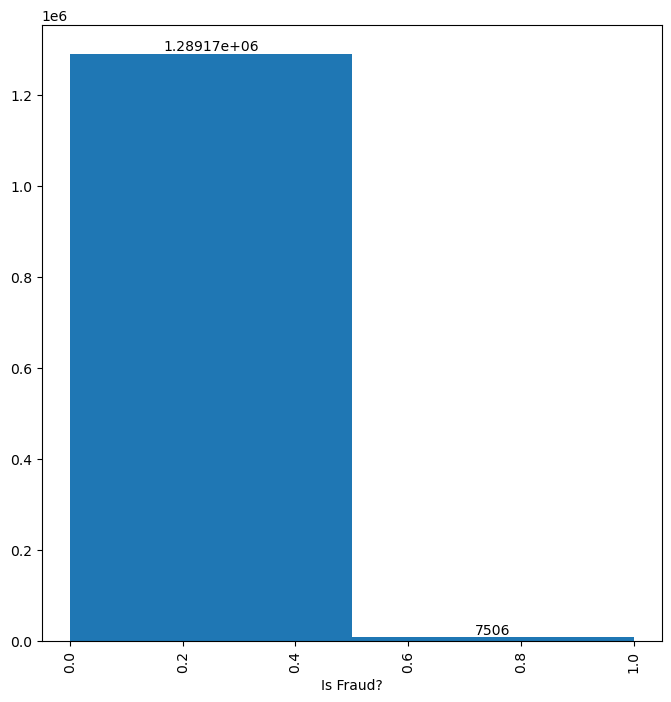

In [13]:
print(dataset['category'].value_counts(normalize=True) * 100)
plotClassHist(dataset['category'],'Category')

print(dataset['city'].value_counts(normalize=True) * 100)
plotClassHist(dataset['city'],'City')

print(dataset['gender'].value_counts(normalize=True) * 100)
plotClassHist(dataset['gender'],'Gender')

print(dataset['state'].value_counts(normalize=True) * 100)
plotClassHist(dataset['state'],'State')

print(dataset['job'].value_counts(normalize=True) * 100)
plotClassHist(dataset['job'],'Job')

print(dataset['is_fraud'].value_counts(normalize=True) * 100)
plotClassHist(dataset['is_fraud'],'Is Fraud?')

# Correlation

In [14]:
dat.corr()

,cc_num,category,amt,gender,city,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
cc_num,1.000000,-0.000320,0.001769,0.001112,-0.002907,-0.036510,-0.059271,-0.048278,-0.008991,-0.043867,0.000354,-0.058942,-0.048252,-0.000981
category,-0.000320,1.000000,-0.059366,-0.003711,-0.003157,-0.001749,-0.005926,0.001053,0.003815,-0.000254,-0.000226,-0.005710,0.001064,-0.039249
amt,0.001769,-0.059366,1.000000,0.001034,0.005179,-0.005258,-0.001926,-0.000187,0.005818,0.003556,-0.000293,-0.001873,-0.000151,0.219404
gender,0.001112,-0.003711,0.001034,1.000000,0.048795,-0.038210,0.042935,0.050404,-0.028649,0.027344,-0.000960,0.042645,0.050350,0.007642
city,-0.002907,-0.003157,0.005179,0.048795,1.000000,0.096590,0.006134,0.058118,-0.059627,0.545040,0.002534,0.006168,0.058052,0.023724
state,-0.036510,-0.001749,-0.005258,-0.038210,0.096590,1.000000,0.123769,0.084299,-0.047138,0.053911,0.001255,0.123003,0.084217,0.002453
lat,-0.059271,-0.005926,-0.001926,0.042935,0.006134,0.123769,1.000000,-0.015533,-0.155730,-0.009870,0.000632,0.993592,-0.015509,0.001894
long,-0.048278,0.001053,-0.000187,0.050404,0.058118,0.084299,-0.015533,1.000000,-0.052715,0.007045,-0.000642,-0.015452,0.999120,0.001721
city_pop,-0.008991,0.003815,0.005818,-0.028649,-0.059627,-0.047138,-0.155730,-0.052715,1.000000,0.019672,-0.001714,-0.154781,-0.052687,0.002136
job,-0.043867,-0.000254,0.003556,0.027344,0.545040,0.053911,-0.009870,0.007045,0.019672,1.000000,0.001133,-0.009839,0.007060,0.011411


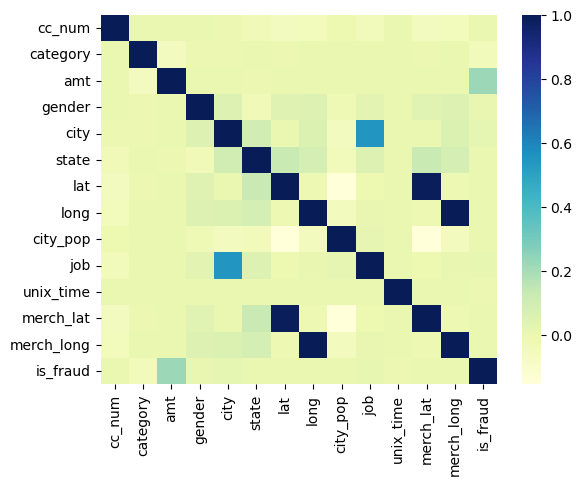

In [15]:
dataplot = sb.heatmap(dat.corr(), cmap="YlGnBu", annot=False)

# Feature statistics

In [16]:
dat.describe()

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [17]:
print(dat.describe().to_csv())

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1296675.0,1296675.0,1296675.0,1296675.0,1296675.0,1296675.0,1296675.0,1296675.0,1296675.0
mean,4.1719204207972666e+17,70.35103545607033,38.53762161489965,-90.22633537864147,88824.44056297839,1349243636.7261226,38.53733804469971,-90.22646479897277,0.005788651743883394
std,1.3088064470002404e+18,160.31603857152774,5.075808438803932,13.759076946486312,301956.360688751,12841278.423359346,5.109788369679177,13.77109056479242,0.07586268973125164
min,60416207185.0,1.0,20.0271,-165.6723,23.0,1325376018.0,19.027785,-166.671242,0.0
25%,180042946491150.0,9.65,34.6205,-96.798,743.0,1338750742.5,34.733572,-96.8972755,0.0
50%,3521417320836166.0,47.52,39.3543,-87.4769,2456.0,1349249747.0,39.36568,-87.43839200000001,0.0
75%,4642255475285942.0,83.14,41.9404,-80.158,20328.0,1359385375.5,41.957164,-80.2367965,0.0
max,4.992346398065154e+18,28948.9,66.6933,-67.9503,2906700.0,1371816817.0,67.510267,-66.950902,1.0



In [19]:
dat_ones = dat['is_fraud'].value_counts()[1]
dat_balance = pd.concat([dat[dat['is_fraud'] == 0].sample(dat_ones),dat[dat['is_fraud'] == 1]]).sample(frac=1).reset_index(drop=True)

In [20]:
dat_balance

,cc_num,category,amt,gender,city,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,3575540972310993,6,1015.20,0,305,28,34.3396,-89.5736,4198,45,1337039377,34.550690,-89.981414,1
1,3547336099599450,3,10.86,1,848,27,41.5097,-73.9634,19880,473,1331513868,42.314965,-74.313655,1
2,6011366578560244,1,301.40,1,607,5,40.5046,-77.7186,4653,405,1326699195,41.005805,-77.122903,1
3,4079773899158,3,20.30,1,157,2,44.6255,-116.4493,129,142,1335696000,43.846744,-117.394620,1
4,4412720572684931,9,89.08,1,544,4,37.7681,-75.6664,776,381,1349033837,37.153226,-75.941014,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,4900628639996,13,66.24,1,181,11,33.9056,-118.0818,105549,421,1338654670,34.303648,-117.537644,0
15008,6501313409525696,8,34.48,0,346,17,31.4467,-103.5791,12747,273,1366384253,30.983319,-104.513843,0
15009,372509258176510,6,56.03,0,459,19,42.9147,-83.4845,6951,333,1350058063,43.562436,-83.523439,0
15010,180094419304907,13,47.39,0,511,11,33.7467,-117.1721,54287,361,1348322958,33.064007,-117.236550,0


In [21]:
dat = dat_balance

In [22]:
dat

,cc_num,category,amt,gender,city,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,3575540972310993,6,1015.20,0,305,28,34.3396,-89.5736,4198,45,1337039377,34.550690,-89.981414,1
1,3547336099599450,3,10.86,1,848,27,41.5097,-73.9634,19880,473,1331513868,42.314965,-74.313655,1
2,6011366578560244,1,301.40,1,607,5,40.5046,-77.7186,4653,405,1326699195,41.005805,-77.122903,1
3,4079773899158,3,20.30,1,157,2,44.6255,-116.4493,129,142,1335696000,43.846744,-117.394620,1
4,4412720572684931,9,89.08,1,544,4,37.7681,-75.6664,776,381,1349033837,37.153226,-75.941014,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,4900628639996,13,66.24,1,181,11,33.9056,-118.0818,105549,421,1338654670,34.303648,-117.537644,0
15008,6501313409525696,8,34.48,0,346,17,31.4467,-103.5791,12747,273,1366384253,30.983319,-104.513843,0
15009,372509258176510,6,56.03,0,459,19,42.9147,-83.4845,6951,333,1350058063,43.562436,-83.523439,0
15010,180094419304907,13,47.39,0,511,11,33.7467,-117.1721,54287,361,1348322958,33.064007,-117.236550,0


# Model analysis

### Data splits

In [28]:
train_dat, test_dat = train_test_split(dat, test_size=0.2)

### DT

In [23]:
from sklearn import tree

In [24]:
mod = tree.DecisionTreeClassifier()
mod.fit(train_dat.loc[:, dat.columns!='is_fraud'],train_dat['is_fraud'])
y_test = mod.predict(test_dat.loc[:, dat.columns!='is_fraud'])

In [25]:
print('Accuracy: ', metrics.accuracy_score(test_dat['is_fraud'],y_test)*100, '%' )
print('Precision: ', metrics.precision_score(test_dat['is_fraud'],y_test)*100, '%' )
print('Recall: ', metrics.recall_score(test_dat['is_fraud'],y_test)*100, '%' )
print('f1 score: ', metrics.f1_score(test_dat['is_fraud'],y_test)*100, '%' )

Accuracy:  94.73859473859474 %
Precision:  95.70389953734303 %
Recall:  93.96495781959766 %
f1 score:  94.82645710543551 %


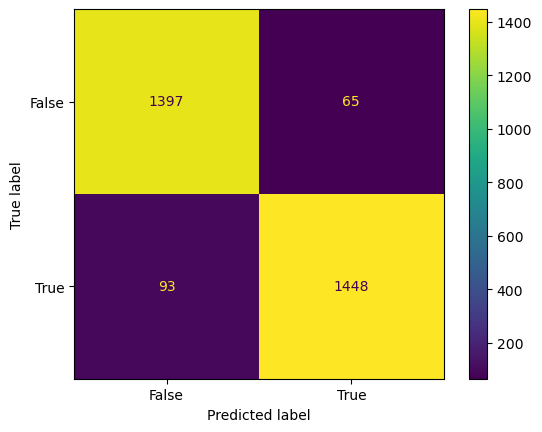

In [26]:
cnf_matrix = metrics.confusion_matrix(test_dat['is_fraud'],y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])
cm_display.plot()

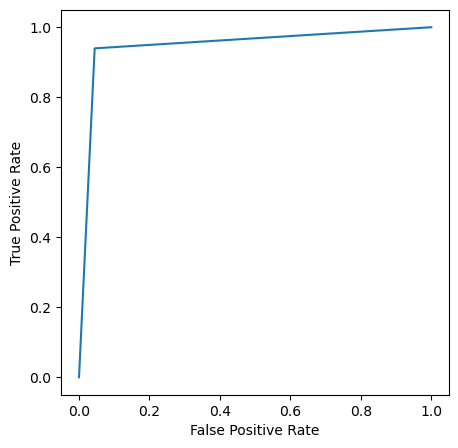

In [27]:
fig,ax = plt.subplots(figsize=(5,5))
fpr, tpr, _ = metrics.roc_curve(test_dat['is_fraud'],y_test)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(ax=ax)

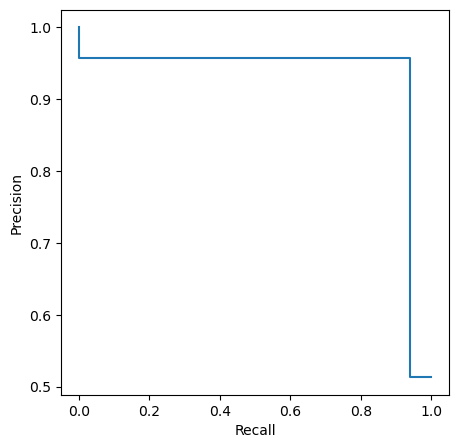

In [28]:
fig,ax = plt.subplots(figsize=(5,5))
prec, recall, _ = metrics.precision_recall_curve(test_dat['is_fraud'],y_test)
pr_display = metrics.PrecisionRecallDisplay(precision=prec, recall=recall)
pr_display.plot(ax=ax)

### Boosting

In [26]:
from sklearn import ensemble

In [64]:
mod = ensemble.AdaBoostClassifier()
mod.fit(train_dat.loc[:, dat.columns!='is_fraud'],train_dat['is_fraud'])
y_test = mod.predict(test_dat.loc[:, dat.columns!='is_fraud'])

In [65]:
print('Accuracy: ', metrics.accuracy_score(test_dat['is_fraud'],y_test)*100, '%' )
print('Precision: ', metrics.precision_score(test_dat['is_fraud'],y_test)*100, '%' )
print('Recall: ', metrics.recall_score(test_dat['is_fraud'],y_test)*100, '%' )
print('f1 score: ', metrics.f1_score(test_dat['is_fraud'],y_test)*100, '%' )

Accuracy:  90.17649017649018 %
Precision:  92.15155615696887 %
Recall:  88.38416612589228 %
f1 score:  90.2285525008281 %


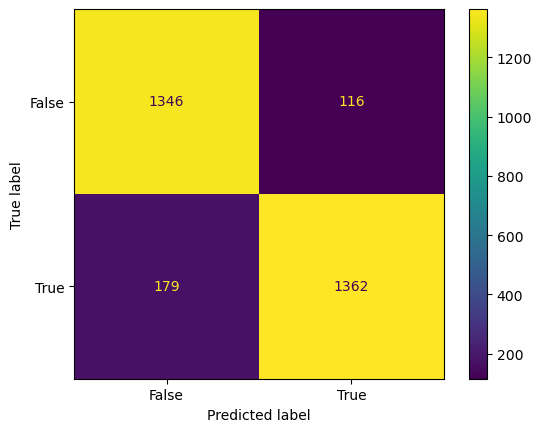

In [66]:
cnf_matrix = metrics.confusion_matrix(test_dat['is_fraud'],y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])
cm_display.plot()

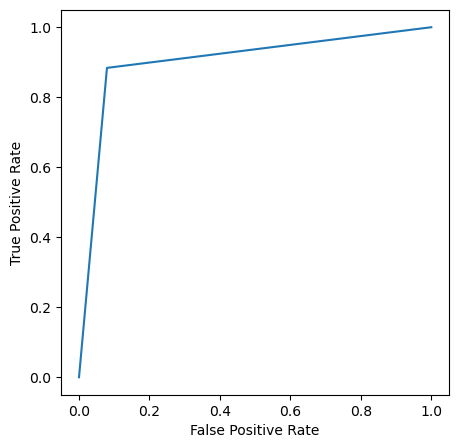

In [67]:
fig,ax = plt.subplots(figsize=(5,5))
fpr, tpr, _ = metrics.roc_curve(test_dat['is_fraud'],y_test)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(ax=ax)

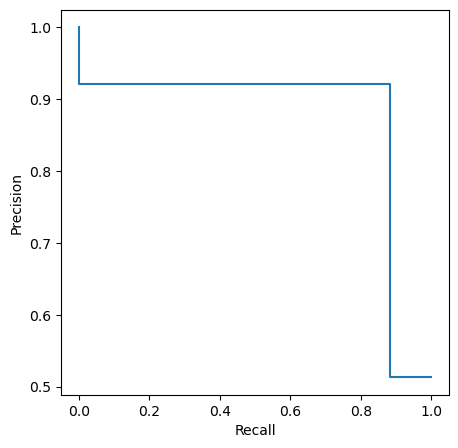

In [68]:
fig,ax = plt.subplots(figsize=(5,5))
prec, recall, _ = metrics.precision_recall_curve(test_dat['is_fraud'],y_test)
pr_display = metrics.PrecisionRecallDisplay(precision=prec, recall=recall)
pr_display.plot(ax=ax)

### RF

In [29]:
mod = ensemble.RandomForestClassifier()
mod.fit(train_dat.loc[:, dat.columns!='is_fraud'],train_dat['is_fraud'])
y_test = mod.predict(test_dat.loc[:, dat.columns!='is_fraud'])

In [30]:
print('Accuracy: ', metrics.accuracy_score(test_dat['is_fraud'],y_test)*100, '%' )
print('Precision: ', metrics.precision_score(test_dat['is_fraud'],y_test)*100, '%' )
print('Recall: ', metrics.recall_score(test_dat['is_fraud'],y_test)*100, '%' )
print('f1 score: ', metrics.f1_score(test_dat['is_fraud'],y_test)*100, '%' )

Accuracy:  95.8041958041958 %
Precision:  96.83848797250859 %
Recall:  94.6272666218939 %
f1 score:  95.72010869565219 %


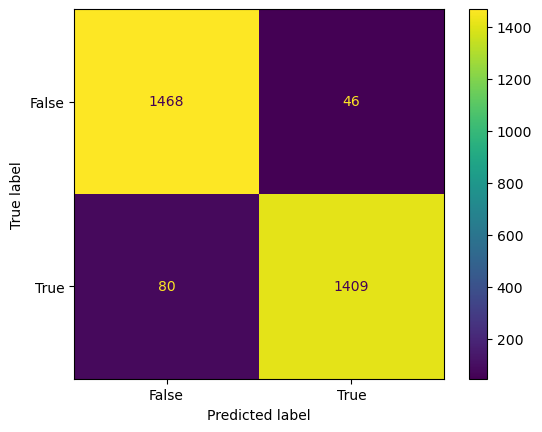

In [31]:
cnf_matrix = metrics.confusion_matrix(test_dat['is_fraud'],y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])
cm_display.plot()

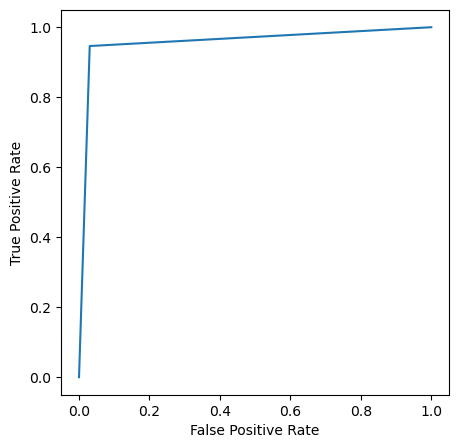

In [32]:
fig,ax = plt.subplots(figsize=(5,5))
fpr, tpr, _ = metrics.roc_curve(test_dat['is_fraud'],y_test)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(ax=ax)

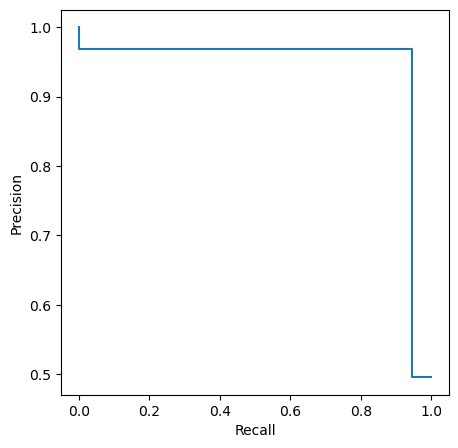

In [33]:
fig,ax = plt.subplots(figsize=(5,5))
prec, recall, _ = metrics.precision_recall_curve(test_dat['is_fraud'],y_test)
pr_display = metrics.PrecisionRecallDisplay(precision=prec, recall=recall)
pr_display.plot(ax=ax)

#### feature importance

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'cc_num'),
  Text(1, 0, 'category'),
  Text(2, 0, 'amt'),
  Text(3, 0, 'gender'),
  Text(4, 0, 'city'),
  Text(5, 0, 'state'),
  Text(6, 0, 'lat'),
  Text(7, 0, 'long'),
  Text(8, 0, 'city_pop'),
  Text(9, 0, 'job'),
  Text(10, 0, 'unix_time'),
  Text(11, 0, 'merch_lat'),
  Text(12, 0, 'merch_long')])

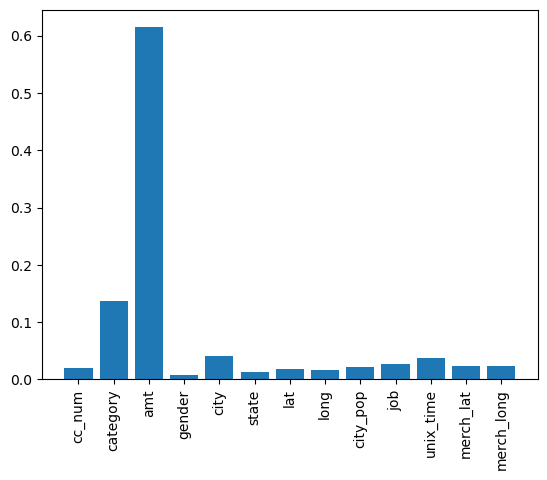

In [47]:
plt.bar(list(train_dat.columns[:-1]),mod.feature_importances_)
plt.xticks(rotation='vertical')
# plt.xticks(ticks=list(range(len(mod.feature_importances_))),labels=list(train_dat.columns[:-1]),rotation='vertical')

### KNN

In [40]:
from sklearn import neighbors

In [41]:
mod = neighbors.KNeighborsClassifier()
mod.fit(train_dat.loc[:, dat.columns!='is_fraud'],train_dat['is_fraud'])
y_test = mod.predict(test_dat.loc[:, dat.columns!='is_fraud'])

In [42]:
print('Accuracy: ', metrics.accuracy_score(test_dat['is_fraud'],y_test)*100, '%' )
print('Precision: ', metrics.precision_score(test_dat['is_fraud'],y_test)*100, '%' )
print('Recall: ', metrics.recall_score(test_dat['is_fraud'],y_test)*100, '%' )
print('f1 score: ', metrics.f1_score(test_dat['is_fraud'],y_test)*100, '%' )

Accuracy:  84.34898434898435 %
Precision:  77.44746283956945 %
Recall:  98.05321219987022 %
f1 score:  86.54066437571592 %


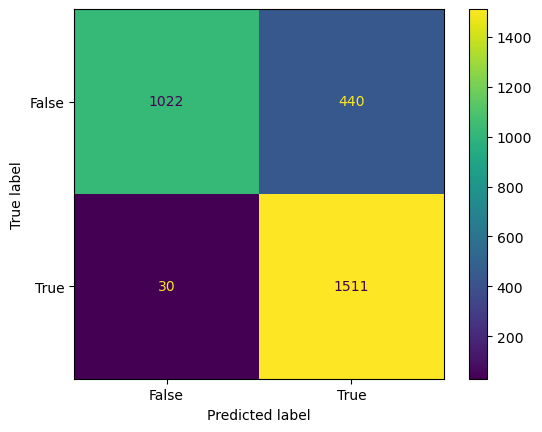

In [43]:
cnf_matrix = metrics.confusion_matrix(test_dat['is_fraud'],y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])
cm_display.plot()

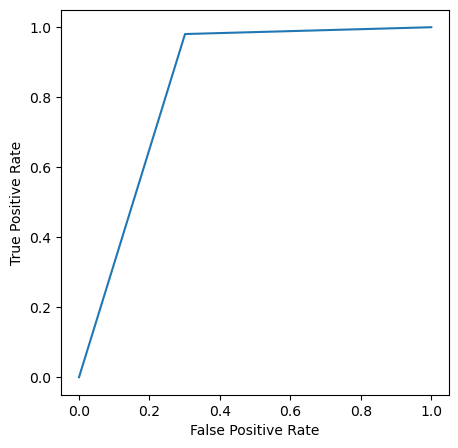

In [44]:
fig,ax = plt.subplots(figsize=(5,5))
fpr, tpr, _ = metrics.roc_curve(test_dat['is_fraud'],y_test)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(ax=ax)

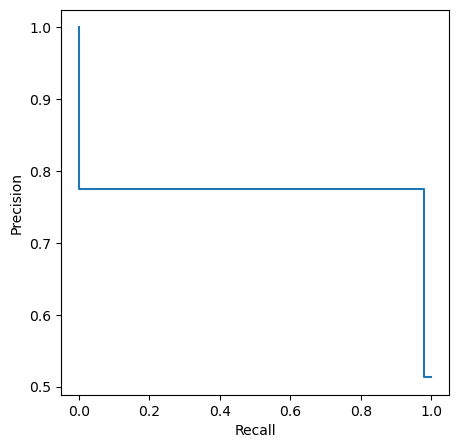

In [45]:
fig,ax = plt.subplots(figsize=(5,5))
prec, recall, _ = metrics.precision_recall_curve(test_dat['is_fraud'],y_test)
pr_display = metrics.PrecisionRecallDisplay(precision=prec, recall=recall)
pr_display.plot(ax=ax)

### SVC

In [46]:
from sklearn import svm

In [47]:
mod = svm.SVC()
mod.fit(train_dat.loc[:, dat.columns!='is_fraud'],train_dat['is_fraud'])
y_test = mod.predict(test_dat.loc[:, dat.columns!='is_fraud'])

In [48]:
print('Accuracy: ', metrics.accuracy_score(test_dat['is_fraud'],y_test)*100, '%' )
print('Precision: ', metrics.precision_score(test_dat['is_fraud'],y_test)*100, '%' )
print('Recall: ', metrics.recall_score(test_dat['is_fraud'],y_test)*100, '%' )
print('f1 score: ', metrics.f1_score(test_dat['is_fraud'],y_test)*100, '%' )

Accuracy:  49.184149184149184 %
Precision:  59.036144578313255 %
Recall:  3.17975340687865 %
f1 score:  6.0344827586206895 %


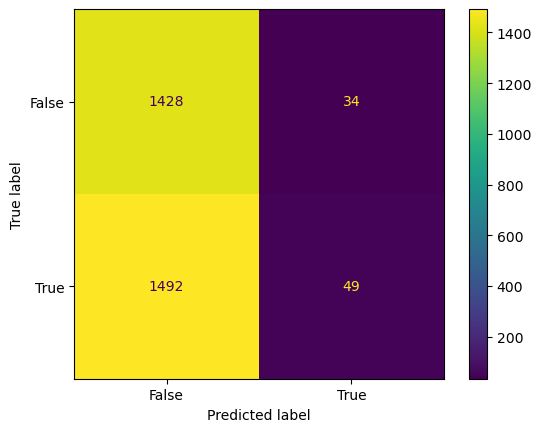

In [49]:
cnf_matrix = metrics.confusion_matrix(test_dat['is_fraud'],y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])
cm_display.plot()

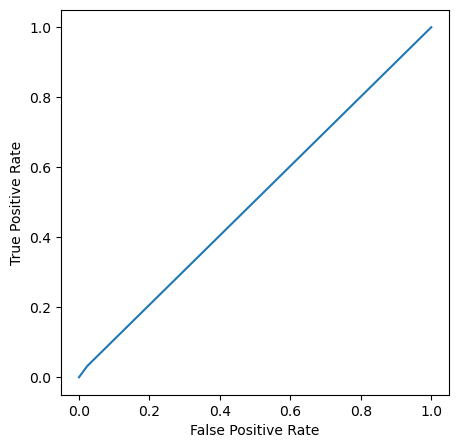

In [50]:
fig,ax = plt.subplots(figsize=(5,5))
fpr, tpr, _ = metrics.roc_curve(test_dat['is_fraud'],y_test)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(ax=ax)

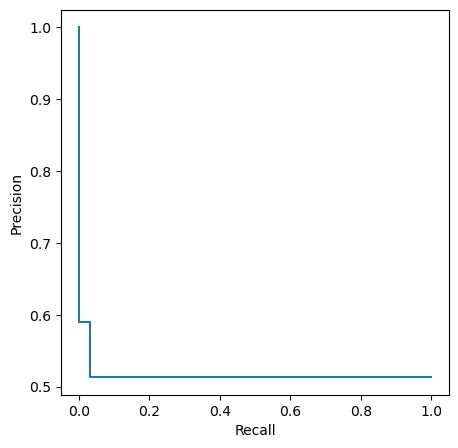

In [51]:
fig,ax = plt.subplots(figsize=(5,5))
prec, recall, _ = metrics.precision_recall_curve(test_dat['is_fraud'],y_test)
pr_display = metrics.PrecisionRecallDisplay(precision=prec, recall=recall)
pr_display.plot(ax=ax)

### MLP

In [53]:
from sklearn import neural_network

In [59]:
mod = neural_network.MLPClassifier(hidden_layer_sizes=(100,100,100))
mod.fit(train_dat.loc[:, dat.columns!='is_fraud'],train_dat['is_fraud'])
y_test = mod.predict(test_dat.loc[:, dat.columns!='is_fraud'])

In [60]:
print('Accuracy: ', metrics.accuracy_score(test_dat['is_fraud'],y_test)*100, '%' )
print('Precision: ', metrics.precision_score(test_dat['is_fraud'],y_test)*100, '%' )
print('Recall: ', metrics.recall_score(test_dat['is_fraud'],y_test)*100, '%' )
print('f1 score: ', metrics.f1_score(test_dat['is_fraud'],y_test)*100, '%' )

Accuracy:  51.31535131535132 %
Precision:  51.31535131535132 %
Recall:  100.0 %
f1 score:  67.82570422535211 %


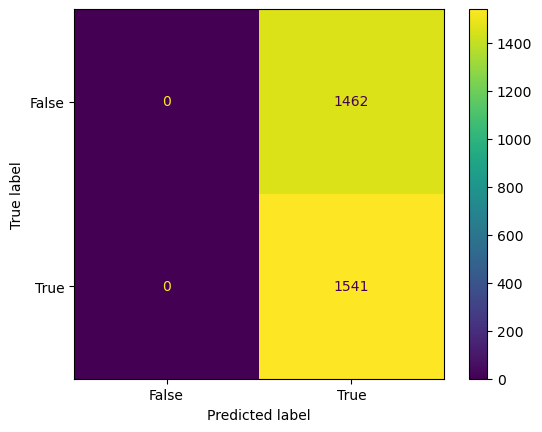

In [61]:
cnf_matrix = metrics.confusion_matrix(test_dat['is_fraud'],y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])
cm_display.plot()

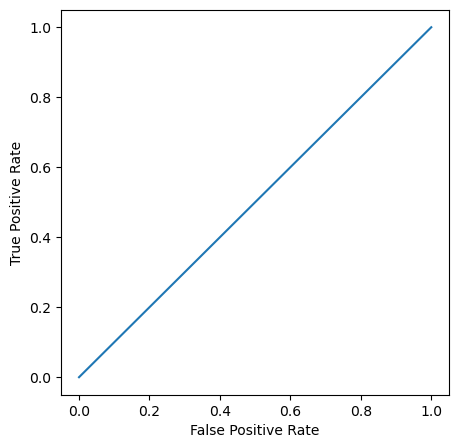

In [62]:
fig,ax = plt.subplots(figsize=(5,5))
fpr, tpr, _ = metrics.roc_curve(test_dat['is_fraud'],y_test)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(ax=ax)

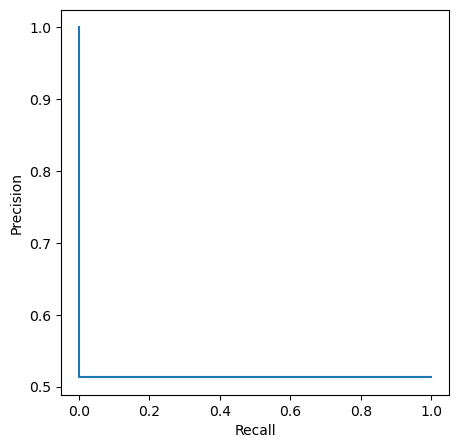

In [63]:
fig,ax = plt.subplots(figsize=(5,5))
prec, recall, _ = metrics.precision_recall_curve(test_dat['is_fraud'],y_test)
pr_display = metrics.PrecisionRecallDisplay(precision=prec, recall=recall)
pr_display.plot(ax=ax)